# 직접 만들어본 머신러닝 알고리즘

- 머신러닝 알고리즘을 완벽하게 이해하기 위하여 학교수업 혹은 구글링을 바탕으로 관련 수식을 이해하고 알고리즘을 만들어 보았다.
- sikit-learn 모듈처럼 class 안에 fit, predict, score 함수를 넣어 구현하였다.
- fit(X_train, y_train) : train data를 적합시키고 모델을 만든다.
- predict(X_test) : 분류기일 경우, 예측 특성값이 들어있는 벡터를 반환한다.
- score(X_test, y_test) : 정답레이블과 예측레이블을 비교하여 정확도를 반환한다.

## KNN(K-Nearest Neighbor) 분류기

### 1. 알고리즘

In [1]:
import numpy as np
import pandas as pd

class k_neighbors_classifier:
    
    def __init__(self, k = 3): # k-최근접 이웃수를 설정할 수 있다. 디폴트 값은 3이다.
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        self.X_test = X_test
        y_pred_list = []
        
        for test_point in self.X_test:
            dist_square_list = [] # test point로부터 train data와의 거리 리스트
            
            for train_point in self.X_train:
                diff_vector = test_point - train_point
                dist_square = np.dot(diff_vector, diff_vector)
                dist_square_list.append(dist_square)
            
            dist_square_df = pd.DataFrame({'y_label' : self.y_train,
                                           'dist_square' : dist_square_list})
            dist_square_df = dist_square_df.sort_values('dist_square') # 거리가 짧은순으로 정렬
            label_index, label_counts = np.unique(dist_square_df['y_label'][: self.k + 1], return_counts = True)
            most_counts_label = label_index[np.argmax(label_counts)] # 가장 많은 특성값을 test point의 특성으로 설정
            y_pred_list.append(most_counts_label)
        
        return y_pred_list
    
    def score(self, X_test, y_test):
        return np.mean(self.predict(X_test) == y_test)

### 2. 검증

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples = 200, centers = 2, n_features=2, random_state=0, cluster_std = 0.4)

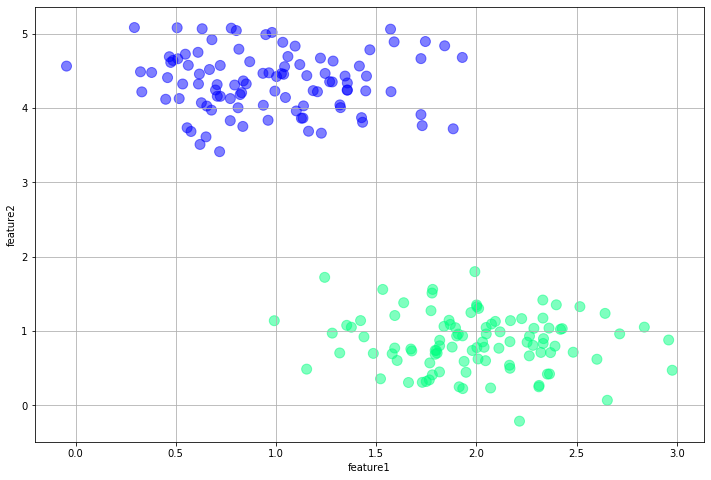

In [3]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter', s = 100, alpha = 0.5)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.grid()
plt.show()

- 위와 같은 데이터 셋을 머신러닝 모델을 이용하여 예측하고자 한다.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
knn = k_neighbors_classifier() # 위에서 만든 지도학습 알고리즘
knn.fit(X_train, y_train) # train data 적합
y_pred = knn.predict(X_test) # 예측 레이블 반환
print('예측 스코어 : ' + str(knn.score(X_test, y_test))) # 예측률 반환

예측 스코어 : 1.0


- 훈련 데이터로 만들어진 모델에 대한 테스트셋의 정확도는 1.0이다.
- 그래프를 통해 확인해보도록 하자

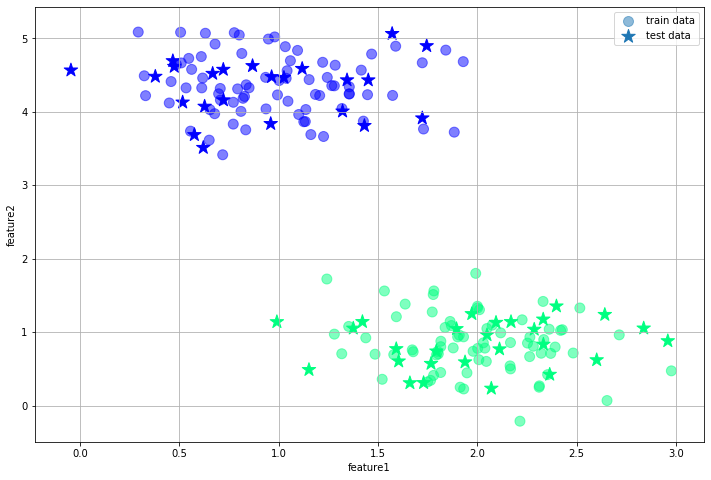

In [6]:
plt.figure(figsize = (12, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter', label = 'train data', s = 100, alpha = 0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, cmap = 'winter', label = 'test data', s = 200, marker = '*')
plt.legend()
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.grid()
plt.show()

- train data는 점으로, test data는 별모양으로 표시하였다.
- 분류가 잘 되어진것을 확인할 수 있다.